In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [222]:
ratio = [0.2]
seed = [12, 13, 17, 18, 29, 32, 50, 58, 77, 87]

#seed = [12, 17, 18, 29, 32, 41, 50, 58, 77, 87]
noniid = 0.4
where='fmnist'
where_origin='fmnist_origin'
epoch = 20

last_round = [[] for i in range(len(seed))]
group = [[] for i in range(len(seed))]

for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/round.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)-1,len(lines)):
                save_round = eval(lines[line].split(" ")[-1])
                
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/num.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(save_round*10,save_round*10+10):
                last_round[s].append(lines[line])
        
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/client.txt'
        with open(path) as f:
            lines = f.readlines()
            group[s].append(lines[len(lines)-3])
            group[s].append(lines[len(lines)-2])
            group[s].append(lines[len(lines)-1])
        
    for i in range(len(last_round[0])):
        last_round[s][i] = last_round[s][i].split(" ")[1]
        last_round[s][i] = int(last_round[s][i].split("/")[0])

    for i in range(len(group[0])):
        group[s][i] = group[s][i].split(":")[1]
        group[s][i] = eval(group[s][i])

In [223]:
print(last_round)
print(group)

[[22, 25, 34, 28, 10, 9, 14, 17, 15, 26], [19, 12, 13, 15, 30, 31, 23, 11, 19, 27], [30, 26, 14, 19, 14, 15, 12, 26, 18, 26], [14, 22, 33, 13, 24, 31, 24, 15, 11, 13], [12, 12, 24, 18, 10, 17, 27, 20, 33, 27], [14, 26, 24, 9, 35, 17, 20, 14, 20, 21], [24, 19, 26, 31, 15, 20, 8, 17, 31, 9], [15, 19, 30, 8, 12, 30, 24, 12, 30, 20], [11, 29, 18, 29, 35, 13, 16, 18, 21, 10], [15, 32, 12, 26, 35, 14, 17, 20, 13, 16]]
[[[6, 4, 8, 5], [7, 0, 9], [1, 3, 2]], [[2, 3, 1, 7], [8, 0, 6], [9, 4, 5]], [[6, 2, 5, 4], [3, 8, 7], [0, 9, 1]], [[9, 3, 0, 7], [1, 8, 4], [6, 5, 2]], [[4, 1, 0, 5], [3, 7, 2], [6, 9, 8]], [[3, 5, 7, 0], [8, 6, 2], [9, 1, 4]], [[6, 9, 4, 7], [1, 0, 2], [5, 3, 8]], [[3, 0, 7, 4], [1, 9, 6], [5, 8, 2]], [[9, 5, 0, 6], [2, 8, 7], [1, 3, 4]], [[2, 5, 0, 9], [8, 6, 7], [3, 1, 4]]]


In [224]:
rec_order_good = [[] for i in range(len(seed))]
rec_order_normal = [[] for i in range(len(seed))]
rec_order_bad = [[] for i in range(len(seed))]

for s in range(len(seed)):
    for g in group[s][0]:
        rec_order_good[s].append(last_round[s][g])
    rec_order_good[s].sort()
    for g in group[s][1]:
        rec_order_normal[s].append(last_round[s][g])
    rec_order_normal[s].sort()
    for g in group[s][2]:
        rec_order_bad[s].append(last_round[s][g])
    rec_order_bad[s].sort()
    #rec_order[s][0].sort(key=lambda tup:tup[1])


print(rec_order_good)
print(rec_order_normal)
print(rec_order_bad)


[[9, 10, 14, 15], [11, 12, 13, 15], [12, 14, 14, 15], [13, 13, 14, 15], [10, 12, 12, 17], [9, 14, 14, 17], [8, 9, 15, 17], [8, 12, 12, 15], [10, 11, 13, 16], [12, 14, 15, 16]]
[[17, 22, 26], [19, 19, 23], [18, 19, 26], [11, 22, 24], [18, 20, 24], [20, 20, 24], [19, 24, 26], [19, 20, 24], [18, 18, 21], [13, 17, 20]]
[[25, 28, 34], [27, 30, 31], [26, 26, 30], [24, 31, 33], [27, 27, 33], [21, 26, 35], [20, 31, 31], [30, 30, 30], [29, 29, 35], [26, 32, 35]]


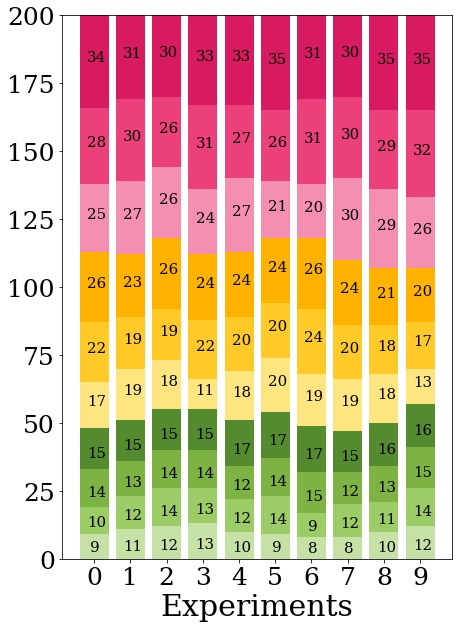

In [227]:
fig, ax = plt.subplots(figsize=(7,10))
#fig.suptitle('New image histogram\n(x: graylevel, y: pixels)',fontsize=20)

x = [i for i in range(len(seed))]
acc = np.array([0 for i in range(len(seed))])

good_color = ['#C5E1A5','#9CCC65','#7CB342','#558B2F','#AED581','#8BC34A','#689F38','#33691E','#A5D6A7']
normal_color = ['#FFE57F','#FFCA28','#FFB300','#FF8F00','#FFCA28','#FFC107','#FFA000','#FF6F00','#FFF59D']
bad_color = ['#F48FB1','#EC407A','#D81B60','#AD1457','#F06292','#E91E63','#C2185B','#880E4F','#ef9a9a']
#ax.set_yticks([0,4,8,12,16,20])
ax.set_xticks(x)

ax.set_xlabel("Experiments",fontsize=30)
#ax.set_ylabel("Malicious clients",fontsize=30)
ax.tick_params(labelsize=25)

y = [0 for i in range(len(seed))]
ax.bar(x,y,color=good_color[2],label="good group")
ax.bar(x,y,color=normal_color[2],label="normal group")
ax.bar(x,y,color=bad_color[2],label="bad group")

#ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.1),ncol=3,fontsize=15)

'''
for i in range(len(seed)):
    for k in range(len(group[i][0])):
        y = [0 for i in range(len(seed))]
        y[i] = last_round[i][group[i][0][k]]
        ax.bar(x,y,bottom=acc,color=good_color[k])
        acc[i] += last_round[i][group[i][0][k]]
        if(y[i]!=0 and ratio[0]>=0.1):
            ax.text(x[i]-0.03,acc[i]-y[i]/2-1,str(y[i]),fontsize=14)
        elif(y[i]!=0):
            ax.text(x[i]-0.03,acc[i]-y[i]/2-0.2,str(y[i]),fontsize=14)
        
    for k in range(len(group[i][1])):
        y = [0 for i in range(len(seed))]
        y[i] = last_round[i][group[i][1][k]]
        ax.bar(x,y,bottom=acc,color=normal_color[k])
        acc[i] += last_round[i][group[i][1][k]]
        if(y[i]!=0 and ratio[0]>=0.1):
            ax.text(x[i]-0.03,acc[i]-y[i]/2-1,str(y[i]),fontsize=14)
        elif(y[i]!=0):
            ax.text(x[i]-0.03,acc[i]-y[i]/2-0.2,str(y[i]),fontsize=14)
            
    for k in range(len(group[i][2])):    
        y = [0 for i in range(len(seed))]
        y[i] = last_round[i][group[i][2][k]]
        ax.bar(x,y,bottom=acc,color=bad_color[k])
        acc[i] += last_round[i][group[i][2][k]]
        if(y[i]!=0 and ratio[0]>=0.1):
            ax.text(x[i]-0.03,acc[i]-y[i]/2-1,str(y[i]),fontsize=14)
        elif(y[i]!=0):
            ax.text(x[i]-0.03,acc[i]-y[i]/2-0.2,str(y[i]),fontsize=14)
'''


for i in range(len(seed)):
    for k in range(len(rec_order_good[i])):
        y = [0 for i in range(len(seed))]
        y[i] = rec_order_good[i][k]
        ax.bar(x,y,bottom=acc,color=good_color[k])
        acc[i] += rec_order_good[i][k]
        if(y[i]!=0 and ratio[0]>=0.1):
            if(y[i]>9):
                ax.text(x[i]-0.2,acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
            else:
                ax.text(x[i]-0.1,acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
        elif(y[i]!=0):
            if(y[i]>9):
                ax.text(x[i]-0.2,acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
            else:
                ax.text(x[i]-0.1,acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
        
    for k in range(len(rec_order_normal[i])):
        y = [0 for i in range(len(seed))]
        y[i] = rec_order_normal[i][k]
        ax.bar(x,y,bottom=acc,color=normal_color[k])
        acc[i] += rec_order_normal[i][k]
        if(y[i]!=0 and ratio[0]>=0.1):
            if(y[i]>9):
                ax.text(x[i]-0.2,acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i]-0.1,acc[i]-y[i]/2,str(y[i]),fontsize=15)
        elif(y[i]!=0):
            if(y[i]>9):
                ax.text(x[i]-0.2,acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i]-0.1,acc[i]-y[i]/2,str(y[i]),fontsize=15)
                
    for k in range(len(rec_order_bad[i])):    
        y = [0 for i in range(len(seed))]
        y[i] = rec_order_bad[i][k]
        ax.bar(x,y,bottom=acc,color=bad_color[k])
        acc[i] += rec_order_bad[i][k]
        if(y[i]!=0 and ratio[0]>=0.1):
            if(y[i]>9):
                ax.text(x[i]-0.2,acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i]-0.1,acc[i]-y[i]/2,str(y[i]),fontsize=15)
        elif(y[i]!=0):
            if(y[i]>9):
                ax.text(x[i]-0.2,acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i]-0.1,acc[i]-y[i]/2,str(y[i]),fontsize=15)

In [228]:
name = './fmnist/noniid_' + str(noniid) +'_ratio_' + str(r) + '_regroup.png'
fig.savefig(name,bbox_inches="tight")

In [8]:
a = [515, 4, 521, 10, 523, 525, 27, 29, 546, 553, 554, 41, 557, 574, 65, 587, 592, 597, 87, 602, 603, 90, 93, 616, 617, 618, 634, 123, 637, 648, 652, 659, 662, 151, 664, 152, 675, 679, 680, 686, 688, 177, 190, 194, 717, 218, 749, 238, 755, 765, 266, 269, 785, 787, 277, 790, 801, 802, 817, 821, 314, 321, 843, 337, 342, 343, 855, 864, 357, 869, 363, 878, 880, 881, 370, 375, 897, 393, 407, 412, 417, 931, 421, 427, 940, 445, 958, 961, 969, 976, 467, 979, 983, 990, 995, 487, 491, 500, 508, 510]

In [245]:
b = [786, 499, 930, 217, 803, 69, 810, 98, 983, 78, 775, 358, 620, 924, 869, 168, 293, 446, 575, 444, 607, 685, 513, 797, 926, 465, 427, 151, 236, 327, 721, 566, 548, 669, 709, 142, 171, 396, 855, 203, 392, 139, 582, 647, 563, 428, 853, 734, 683, 984, 451, 840, 15, 314, 839, 749, 103, 192, 915, 693, 216, 123, 878, 791, 52, 114, 111, 310, 483, 76, 199, 857, 999, 369, 457, 191, 502, 908, 613, 71, 408, 48, 354, 99, 425, 846, 336, 736, 886, 630, 879, 505, 341, 214, 880, 865, 172, 585, 352, 362, 211, 326, 888, 948, 961, 725, 741, 834, 407, 767, 689, 901, 780, 280, 754, 666, 753, 968, 402, 856, 756, 604, 463, 917, 46, 617, 892, 533, 169, 679, 779, 577, 56, 700, 771, 464, 450, 923, 718, 628, 500, 115, 28, 343, 105, 509, 552, 345, 842, 866, 962, 579, 668, 904, 699, 144, 868, 832, 873, 265, 777, 996, 277, 997, 542, 535, 318, 655, 491, 518, 135, 381, 609, 796, 107, 196, 325, 902, 449, 223, 905, 978, 637, 814, 523, 860, 848, 416, 694, 747, 624, 181, 80, 333, 825, 384, 982, 511, 285, 644, 525, 759, 431, 626, 138, 159, 470, 254, 133, 379, 702, 537, 649, 311, 403, 479, 383, 634, 399, 290, 507, 18, 994, 564, 445, 264, 720, 173, 588, 365, 62, 347, 565, 688, 484, 462, 301, 299, 512, 872, 386, 73, 805, 870, 646, 39, 109, 29, 874, 60, 593, 898, 807, 667, 971, 355, 20, 323, 102, 532, 269, 108, 194, 95, 185, 420, 359, 592, 517, 16, 489, 632, 985, 432, 459, 439, 515, 692, 372, 965, 516, 735, 798, 412, 364, 744, 101, 631, 701, 992, 769, 762, 268, 819, 92, 84, 243, 987, 487, 861, 804, 476, 409, 376, 162, 453, 295, 155, 911, 558, 47, 304, 88, 0, 10, 799, 306, 77, 424, 252, 989, 164, 319, 944, 117, 400, 75, 349, 890, 776, 312, 751, 497, 730, 329, 988, 544, 922, 249, 508, 170, 571, 55, 705, 220, 761, 466, 404, 335, 486, 186, 454, 490, 398, 89, 675, 910, 789, 206, 760, 578, 707, 815, 618, 40, 291, 430, 958, 801, 74, 131, 212, 793, 524, 539, 885, 704, 584, 305, 714, 622, 440, 891, 435, 851, 283, 950, 44, 974, 389, 32, 433, 30, 697, 696, 324, 31, 278, 752, 406]
j = []
for i in a:
    if i in b:
        j.append(i)

In [429]:
j

[515,
 10,
 523,
 525,
 29,
 592,
 617,
 618,
 634,
 123,
 637,
 151,
 675,
 679,
 688,
 194,
 749,
 269,
 277,
 801,
 314,
 343,
 855,
 869,
 878,
 880,
 407,
 412,
 427,
 445,
 958,
 961,
 983,
 487,
 491,
 500,
 508]